In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets

# Problem 1

In this problem we will look at image compression using SVD, following the lines of the well-known "Eigenfaces" experiment. The basic concept is to represent an image (in grayscale) of size $m \times n$ as an $m \times n$ real matrix $M$. SVD is then applied to this matrix to obtain $U$, $S$, and $V$ such that $M = U S V^T$. Here $U$ and $V$ are the matrices whose columns are the left and right singular vectors respectively, and $S$ is a diagonal $m \times n$ matrix consisting of the singular values of $M$. The number of non-zero singular values is the rank of $M$. By using just the largest $k$ singular values (and corresponding left and right singular vectors), one obtains the best rank-$k$ approximation to $M$.

The following code returns the dataset of 400 images.

In [2]:
data = datasets.fetch_olivetti_faces()
images = data.images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/b407404/scikit_learn_data


(a) Given an $m \times n$ image $M$ and its rank-$k$ approximation $A$, we can measure the reconstruction error using mean $\ell_1$ error: $$ \text{error}_{\ell_1}(M, A) = \frac{1}{mn}\| M - A \|_1 = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}| M_{i,j} - A_{i,j} |. $$ For $k = 1, \dots, 30$, take the average rank-$k$ reconstruction error over all images in the dataset, and plot a curve of average reconstruction error as a function of $k$.

In [4]:
# Returns the best rank-k approximation to M
def svd_reconstruct(M, k):
    # Perform SVD on M
    U, s, Vt = svd(M, full_matrices=False)
    
    # Keep only the top k singular values and vectors
    U_k = U[:, :k]
    s_k = s[:k]
    Vt_k = Vt[:k, :]
    
    # Reconstruct the rank-k approximation
    A_k = U_k @ np.diag(s_k) @ Vt_k
    
    return A_k

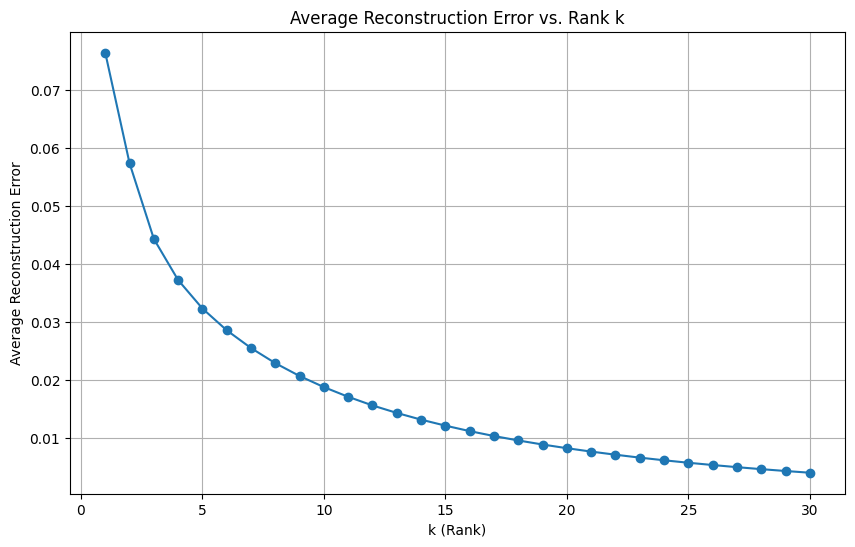

In [5]:
# Function to calculate mean L1 error
def error_l1(M, A):
    return np.mean(np.abs(M - A))

# Calculate average reconstruction error for k = 1 to 30
k_values = range(1, 31)
avg_errors = []

for k in k_values:
    errors = []
    for image in images:
        reconstructed = svd_reconstruct(image, k)
        error = error_l1(image, reconstructed)
        errors.append(error)
    avg_errors.append(np.mean(errors))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_errors, marker='o')
plt.xlabel('k (Rank)')
plt.ylabel('Average Reconstruction Error')
plt.title('Average Reconstruction Error vs. Rank k')
plt.grid(True)
plt.show()

(b) Pick any image in the dataset, and display the following side-by-side as images: the original, and the best rank-$k$ approximations for $k = 10, 20, 30, 40$. You will find the `imshow` method in matplotlib useful for this; pass in `cmap='gray'` to render in grayscale. Feel free to play around further.

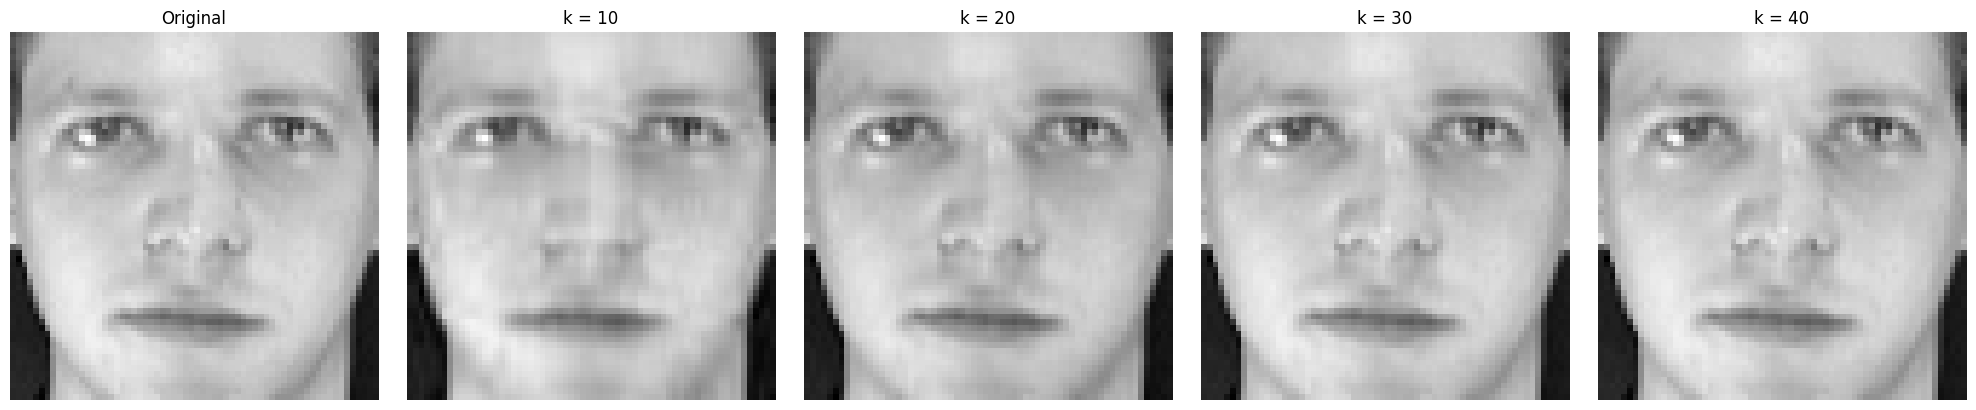

In [6]:
# Choose an image (e.g., the first one)
image = images[0]

# Create a figure with 5 subplots side by side
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Display original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')

# Display reconstructions for k = 10, 20, 30, 40
for i, k in enumerate([10, 20, 30, 40]):
    reconstructed = svd_reconstruct(image, k)
    axs[i+1].imshow(reconstructed, cmap='gray')
    axs[i+1].set_title(f'k = {k}')
    axs[i+1].axis('off')

plt.tight_layout()
plt.show()

# Problem 2

In this problem we visualize the Wisconsin breast cancer dataset in two dimensions using PCA. First, rescale the data so that every feature has mean 0 and standard deviation 1 across the various points in the dataset. You may find `sklearn.preprocessing.StandardScaler` useful for this. Next, compute the top two principal components of the dataset using PCA, and for every data point, compute its coordinates (i.e. projections) along these two principal components. You should do this in two ways:
1. By using SVD directly. Do not use any PCA built-ins.
2. By using `sklearn.decomposition.PCA`.

The two approaches should give exactly the same result, and this also acts as a check. (But note that the signs of the singular vectors may be flipped in the two approaches since singular vectors are only determined uniquely up to sign. If this happens, flip signs to make everything identical again.)

Your final goal is to make a scatterplot of the dataset in 2 dimensions, where the x-axis is the first principal component and the y-axis is the second. Color the points by their diagnosis (malignant or benign). Do this for both approaches. Your plots should be identical. Does the data look roughly separable already in 2 dimensions?

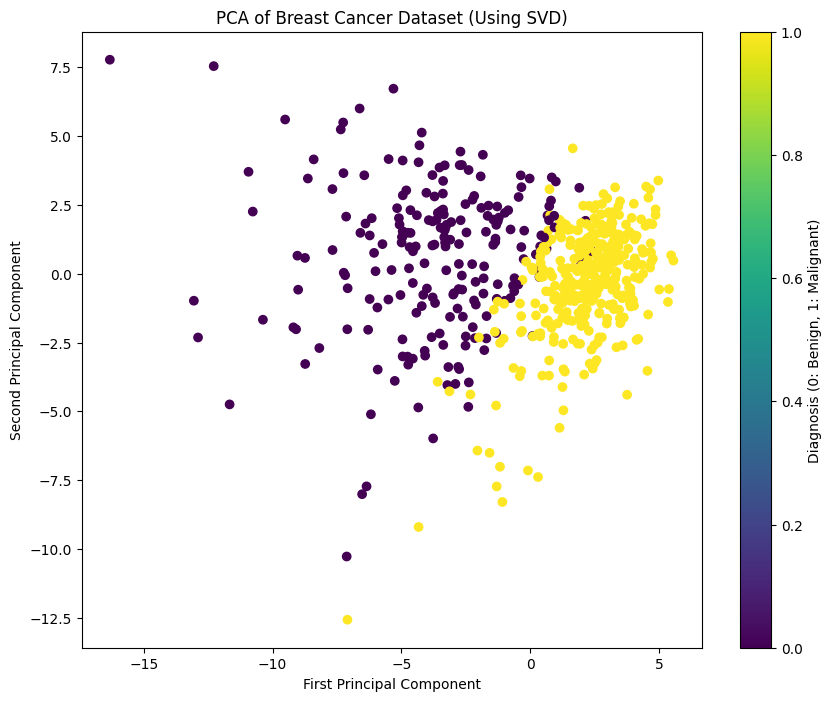

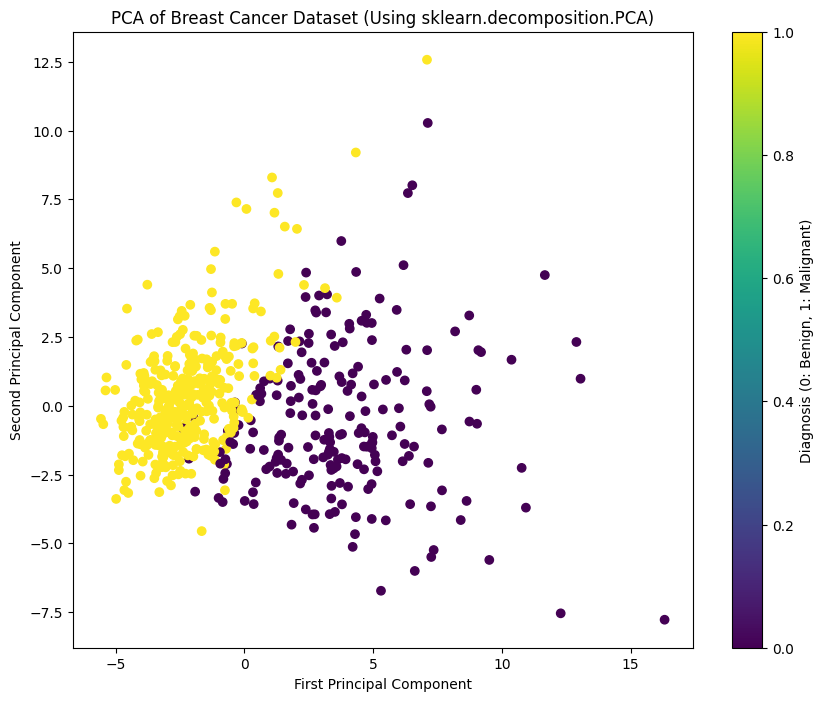

Are the projections identical? True


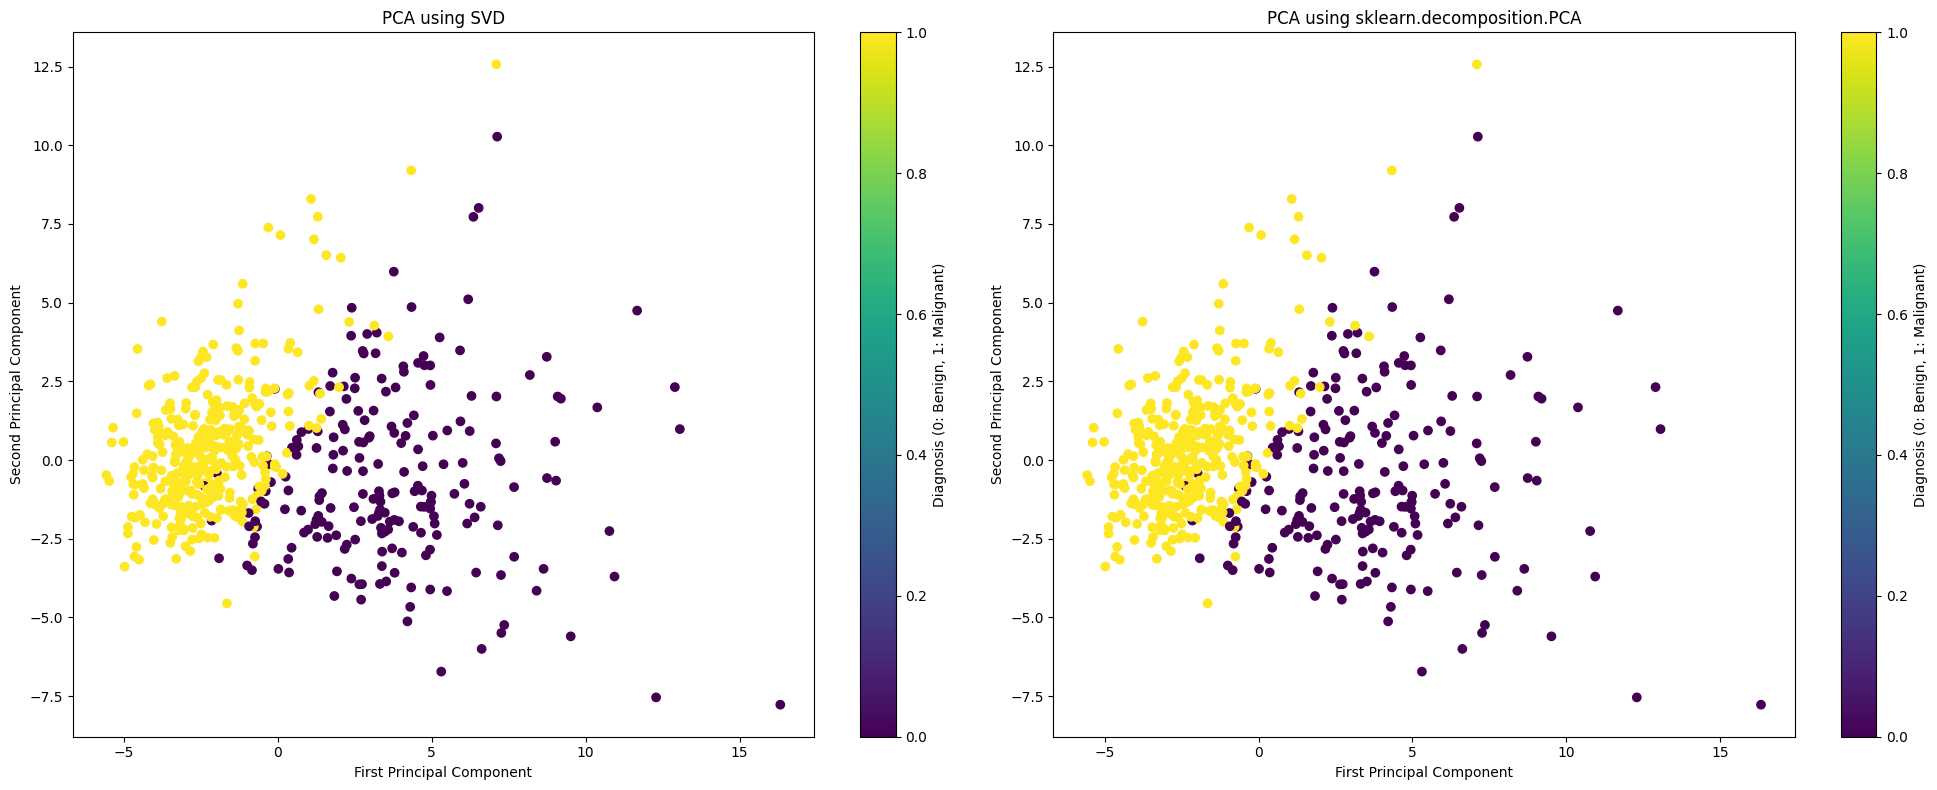

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the Wisconsin breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (a) PCA using SVD directly
U, s, Vt = np.linalg.svd(X_scaled, full_matrices=False)
projection_svd = X_scaled @ Vt.T[:, :2]

# Plot SVD-based PCA
plt.figure(figsize=(10, 8))
scatter_svd = plt.scatter(projection_svd[:, 0], projection_svd[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset (Using SVD)')
plt.colorbar(scatter_svd, label='Diagnosis (0: Benign, 1: Malignant)')
plt.show()

# (b) PCA using sklearn
pca = PCA(n_components=2)
projection_pca = pca.fit_transform(X_scaled)

# Check if signs need to be flipped
if np.sign(projection_svd[0, 0]) != np.sign(projection_pca[0, 0]):
    projection_svd[:, 0] *= -1
if np.sign(projection_svd[0, 1]) != np.sign(projection_pca[0, 1]):
    projection_svd[:, 1] *= -1

# Plot sklearn-based PCA
plt.figure(figsize=(10, 8))
scatter_pca = plt.scatter(projection_pca[:, 0], projection_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset (Using sklearn.decomposition.PCA)')
plt.colorbar(scatter_pca, label='Diagnosis (0: Benign, 1: Malignant)')
plt.show()

# Verify that the results are identical
print("Are the projections identical?", np.allclose(projection_svd, projection_pca))

# Plot both results side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

scatter1 = ax1.scatter(projection_svd[:, 0], projection_svd[:, 1], c=y, cmap='viridis')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('PCA using SVD')
fig.colorbar(scatter1, ax=ax1, label='Diagnosis (0: Benign, 1: Malignant)')

scatter2 = ax2.scatter(projection_pca[:, 0], projection_pca[:, 1], c=y, cmap='viridis')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('PCA using sklearn.decomposition.PCA')
fig.colorbar(scatter2, ax=ax2, label='Diagnosis (0: Benign, 1: Malignant)')

plt.tight_layout()
plt.show()

## Does the data look roughly separable already in two dimensions?

Yes, the data appears roughly separable in two dimensions. Key observations:

1. Two distinct clusters are visible, with benign cases (yellow) concentrated on the left and malignant cases (purple) on the right.
2. There's minimal overlap between classes, mainly in the center.
3. A clear diagonal trend exists, with benign cases generally having lower values on both principal components.
4. Both SVD and sklearn.decomposition.PCA methods produce nearly identical plots, confirming the separation's robustness.
5. Some outliers exist, particularly for malignant cases, but they maintain the general separation trend.

While not perfectly separated, this 2D representation captures meaningful differences between benign and malignant cases, suggesting that even a simple classifier could potentially achieve good performance in this reduced space.